<a href="https://colab.research.google.com/github/bikiram/Remote-Sensing/blob/main/Time_series_ndvi_tracking_final_Biki_Ram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series NDVI tracking of Ukraine before an dafter war (2021 - 2022)


* We have collected the data of MODIS satellite which provides the NDVI value
* We have uploaded the data set in separate folder in google drive 
* And gathered all the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import numpy as np 
from osgeo import gdal
from matplotlib import pyplot as plt
import os
from pylab import *
import matplotlib as mpl

# Downloaded and extracted the tiff files of the are of interest 
1. Whole Ukraine
2. East Ukraine
3. West Ukraine
4.Creamea
5. Donbas
6.Kyiv

In [ ]:
# whole ukraine
whole_ukr_2021_path ="/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/remote sensing 2021_mask layer/Mask 2021"
whole_ukr_2022_path ="/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/croppe"
# east ukraine
east_ukr_2021_path="/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/east_west_ukr_2021/east 21"
east_ukr_2022_path="/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/enw/east"
# west ukraine
west_ukr_2021_path="/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/east_west_ukr_2021/west 21"
west_ukr_2022_path="/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/enw/west"
#creamea
creamea_ukr_2021_path="/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/creamea 21"
creamea_ukr_2022_path="/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/cdk22/creamea"
#donbas
donbas_ukr_2021_path="/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/donbas 21"
donbas_ukr_2022_path="/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/cdk22/donbas"

#kyiv
kyiv_2021="/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/Kyiv 21"
kyiv_2022="/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/cdk22/kyiv"

In [ ]:
path=[whole_ukr_2021_path,whole_ukr_2022_path,east_ukr_2021_path,east_ukr_2022_path,west_ukr_2021_path,west_ukr_2022_path,creamea_ukr_2021_path,creamea_ukr_2022_path,donbas_ukr_2021_path,donbas_ukr_2022_path,kyiv_2021,kyiv_2022]

* The following panel We have plotted the image of the area of interest and have saved the mean value of the NDVI for the Time series data.
* Modis has observed the regions after 16 days and the date of cooresponding observation can be seen in the title of each Image.
*  In the first panel we have analysed the Whole ukarine and region and plotted the time series data to visualize the change in two different year.

# Navigation through different data set

* By changing the cd (change dataset) variable we cannavigate through diffrent folders of data set and can plot them using the same single code.

* cd = 0 will provide the images of Whole Ukrasine region during 2021 and 2022

* cd = 2 will navigate to east ukraine data
* cd = 4 will naviagte to west ukraine data
* cd = 6 will navigate to crimea data
* cd = 8 will navigate to donbas data
* cd = 10 will navigate to kyiv data

# Navigation through the code

* in the first loop we have read the data set of study and saved the file path in an list named data

* In the second loop we have extracted the image from the tiff file and we have done the masking 
* later on in the same loop we have done the DN value to NDVI conversion

In th nxt following panels We have done the same analysis  for diffrent region and visualized the change. 

/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/remote sensing 2021_mask layer/Mask 2021/Mask_01_01_21.tif
/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/remote sensing 2021_mask layer/Mask 2021/mask_01_17_21.tif
/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/remote sensing 2021_mask layer/Mask 2021/mask_02_02_21.tif
/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/remote sensing 2021_mask layer/Mask 2021/mask_02_18_21.tif
/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/remote sensing 2021_mask layer/Mask 2021/mask_03_06_21.tif
/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/remote sensing 2021_mask layer/Mask 2021/mask_03_22_21.tif
/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/remote sensing 2021_mask layer/Mask 2021/mask_04_07_21.tif
/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/remote sensing 2021_mask layer/Mask 2021/ma

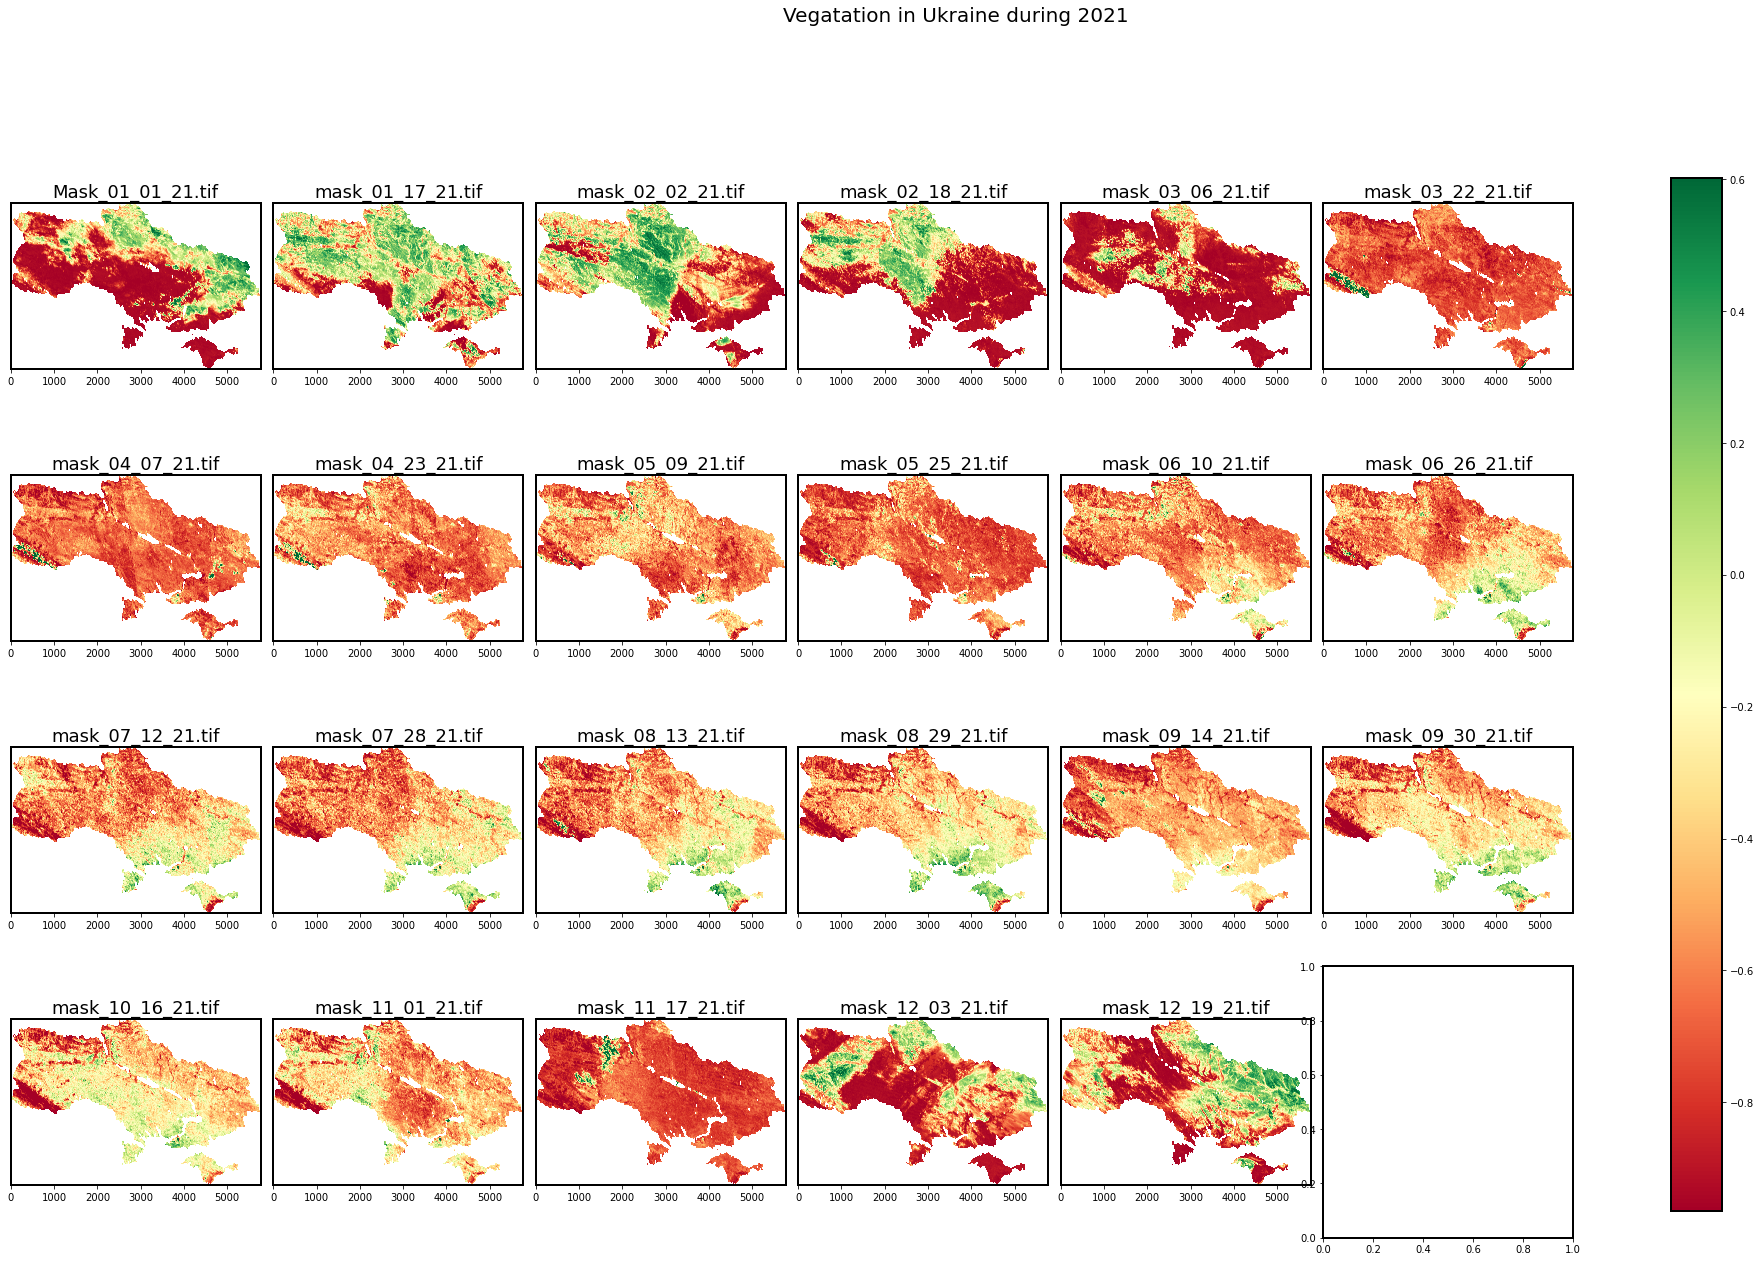

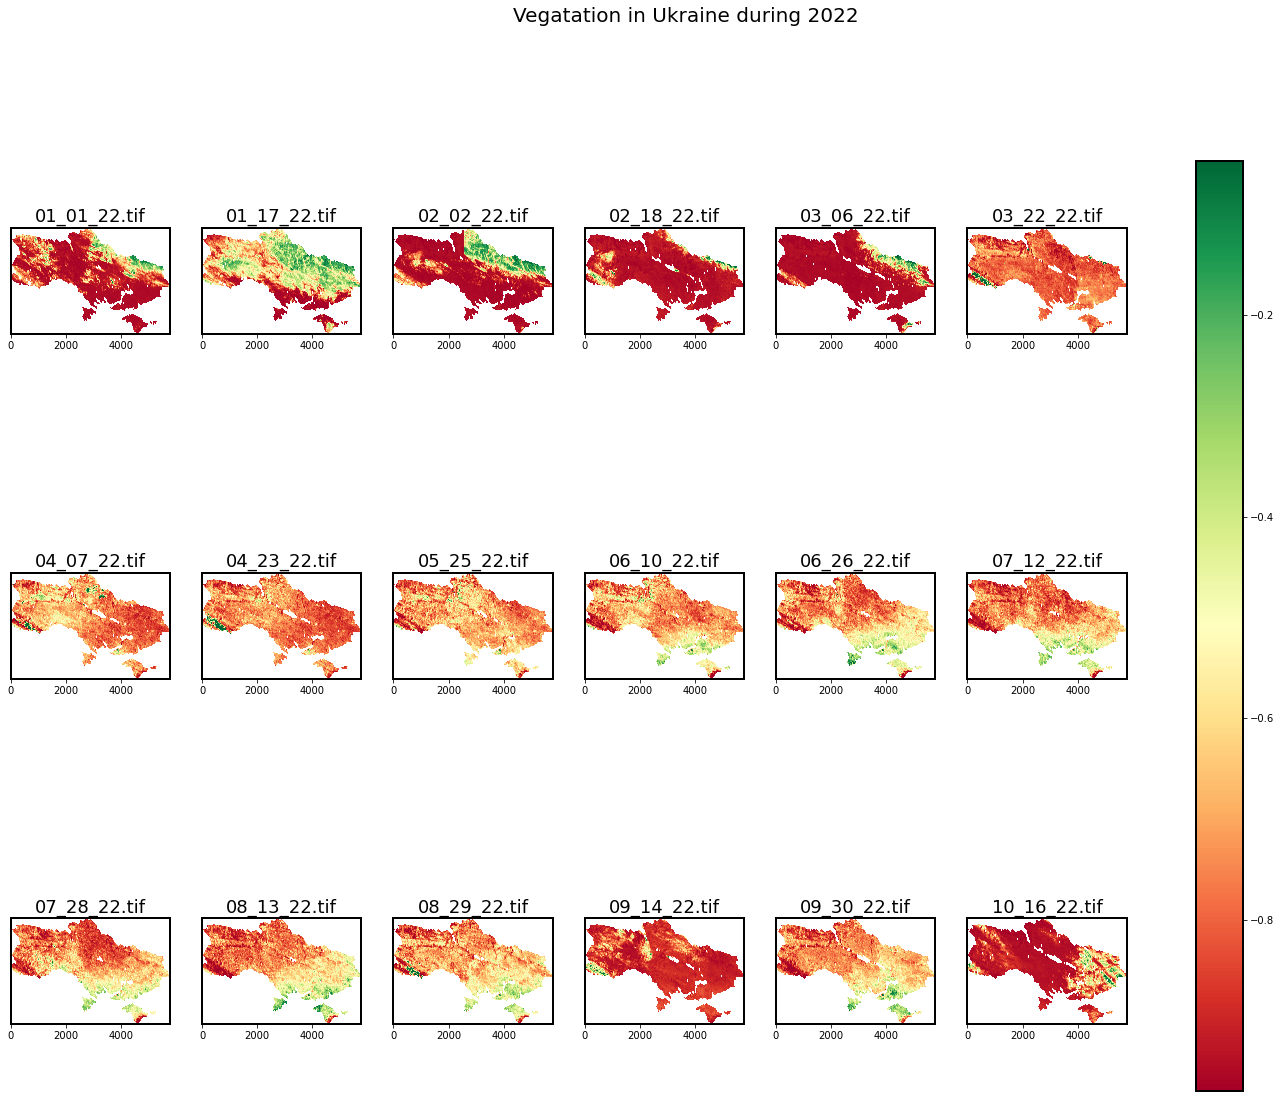

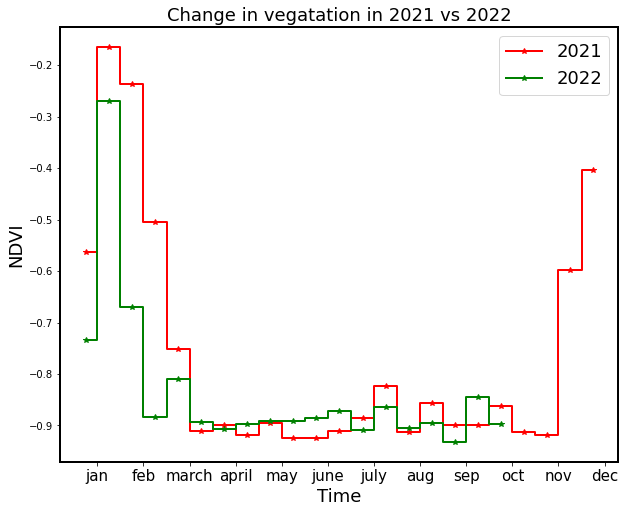

In [ ]:
dt=[]
data=[]
change_data=[0,2,4,6,8]
cd=0
# chnage the cd value to select desired data set
# reading the data set in this loop
for i in range(0,2,1):
  os.chdir(path[i+cd])
  def read_files(file_path):
    with open(file_path, 'r') as file:
        print(file.read())
  for file in os.listdir():
    if file.endswith('.tif'):
        file_path=os.path.join(path[i+cd],file)
        data.append(file_path)
        dt.append(file)
        print(file_path)
# from the data we are extracting the image in this loop also 
ds2=[]
m2=[]
std2=[]
for j in range(0,len(data),1):
    ds = gdal.Open(data[j]).ReadAsArray()
    ds[ds == 0] = np.nan
    a=np.nanmin(ds)
    b=np.nanmax(ds)
    c=-1
    d=1
    e=ds-a
    f=e/(b-a)
    g=f*(d-c)
    hh=g+c
    ds2.append(hh)
    mean=np.nanmean(hh)
    std=np.nanstd(hh)
    m2.append(mean)
    std2.append(std)
fig, axs = plt.subplots(4,6, figsize=(35, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.001, wspace=0.05)
#fig.suptitle("Vegatation in Ukraine during 2021", fontsize=20)
axs = axs.ravel()
mpl.rcParams['lines.linewidth'] = 2
rc('axes', linewidth=2)
for k in range(0,23,1):
    vmin=np.nanquantile(ds2[k],0.05)
    vmax=np.nanquantile(ds2[k],0.99)
    im=axs[i].imshow(ds2[k],vmax=vmax,vmin=vmin,cmap='RdYlGn')
    axs[i].set_title(dt[k],fontsize=18)
    axs[i].set_yticks([])

cbar = fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.95)
#plt.savefig('/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/results/ukraine_2021_vagetation.jpg',dpi=200)
fig, axs = plt.subplots(3,6, figsize=(25, 18), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.0001, wspace=0.001)
axs = axs.ravel()
#fig.suptitle("Vegatation in Ukraine during 2022", fontsize=20)
mpl.rcParams['lines.linewidth'] = 2
rc('axes', linewidth=2)
for i in range(0,18,1):
      print(i,dt[i+23])
      vmin=np.nanquantile(ds2[i+23],0.05)
      vmax=np.nanquantile(ds2[i+23],0.99)
      #rc('axes', linewidth=4)
      im=axs[i].imshow(ds2[i+23],vmax=vmax,vmin=vmin,cmap='RdYlGn')
      axs[i].set_title(dt[i+23],fontsize=18)
      axs[i].set_yticks([])
cbar = fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.95)
#plt.savefig('/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/results/ukraine_2022_vagetation_images.jpg',dpi=400)
x=np.arange(0,23,1)
plt.figure(figsize=(10,8))
plt.step(x, m2[0:23],'*-', where='mid',color='r',label='2021')
plt.step(x[0:19], m2[23:len(dt)], '*-', where='mid',color='green',label='2022')
plt.ylabel('NDVI',fontsize=18)
plt.xlabel('Time',fontsize=18)
#plt.title('Change in vegatation in 2021 vs 2022',fontsize=18)
plt.legend(loc='upper right',fontsize=18)
plt.xticks([0.5,2.5,4.5,6.5,8.5,10.5,12.5,14.5,16.5,18.5,20.5,22.5],['jan','feb','march','april','may','june','july','aug','sep','oct','nov','dec'],fontsize=15)
#plt.savefig('/content/drive/My Drive/PhD/course_work/2nd sem/aa407/project/data2/results/ukr_vegatation_change_21_22.jpg',dpi=400)